In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
csv_data = '''A,B,C,D
   1.0,2.0,3.0,4.0
   5.0,6.0,,8.0
   10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))

In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

### Eliminating samples or features with missing values

In [5]:
df.dropna()
#deleting rows with missing values

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
# only drop rows where all columns are NaN
df.dropna(how='all')
   # drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)
   # only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### mean imputation
we simply replace the missing value by the mean value of the entire feature column
A convenient way to achieve this is by using the Imputer class from scikit-learn

In [8]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
#Other options for the strategy parameter are median or most_frequent
imr.fit(df)
imurated_data = imr.transform(df.values)
imurated_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

## Handling categorical data
When we are talking about categorical data, we have to further distinguish between nominal and ordinal features. Ordinal features can be understood as categorical values that can be sorted or ordered. For example, T-shirt size would be an ordinal feature, because we can de ne an order XL > L > M. In contrast, nominal features don't imply any order and, to continue with the previous example, we could think of T-shirt color as a nominal feature since it typically doesn't make sense to say that, for example, red is larger than blue.

In [9]:
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [10]:
# size_mapping = {
#     'XL':3,
#     'M':2,
#     'L':1
# }
# df['size'] = df['size'].map(size_mapping)
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [11]:
#Encoding Class Labels
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping


{'class1': 0, 'class2': 1}

In [12]:
df['classlabel'] = df['classlabel'].map(class_mapping)

In [13]:
#for inversing
inv_class_mapping = {v:k for k,v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)


In [14]:
#we can use label encoder class from scikit learn to achieve the same
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

In [15]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [16]:
X = df[['color','size','price']].values
X[:,0] = class_le.fit_transform(X[:,0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

# Performing one-hot encoding on nominal features

In [17]:
ohe = OneHotEncoder(categorical_features=[0], sparse = False)
ohe.fit_transform(X)

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [18]:
#ohe.fit_transform(df).toarray()
#df['classlabel'] = df['classlabel'].map(y)
#df['color'] = class_le.fit_transform(df['color'])

In [19]:
pd.get_dummies(df[['color','size','price']])

,size,price,color_blue,color_green,color_red
0,1,10.1,0,1,0
1,2,13.5,0,0,1
2,3,15.3,1,0,0


In [20]:
df_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [21]:
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
df_wine.columns

Index(['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [22]:
np.unique(df_wine['Class label'])

array([1, 2, 3])

In [23]:
X,y = df_wine.iloc[:,1:], df_wine.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)


### Normalization

In [24]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### Standardization

In [25]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std

array([[ 0.91083058, -0.46259897, -0.01142613, ...,  0.65706596,
         1.94354495,  0.93700997],
       [-0.95609928, -0.96608672, -1.53725357, ..., -0.40859506,
         0.58118003, -1.41336684],
       [ 0.35952243,  1.67501572, -0.37471838, ..., -1.55950896,
        -1.44846566,  0.28683658],
       ..., 
       [-0.70550467, -0.68342693, -0.62902295, ...,  0.44393375,
         0.49776993, -1.30608823],
       [ 1.14889546, -0.6215951 , -0.88332752, ..., -0.19546286,
         1.0121322 ,  0.77446662],
       [ 1.47466845,  0.11155374,  0.42452457, ..., -1.43162964,
        -1.23994042, -0.28206514]])

If we notice that a model performs much better on a training dataset than on the test dataset, this observation is a strong indicator for over tting. Over tting means that model  ts the parameters too closely to the particular observations in the training dataset but does not generalize well to real data—we say that the model has a high variance. A reason for over tting is that our model is too complex for the given training data and common solutions to reduce the generalization error are listed
as follows:
• Collect more training data
• Introduce a penalty for complexity via regularization
• Choose a simpler model with fewer parameters
• Reduce the dimensionality of the data


## Sparse solution with L1 regularization

In [26]:
#lets try the L1 regularization with LogistiRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C=0.1)
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std,y_train))
print(lr.score(X_test_std,y_test))

0.983870967742
0.981481481481


In [27]:
lr.intercept_
#Since we the  t the LogisticRegression object on a multiclass dataset, it uses the One-vs-Rest (OvR) approach by default where the  rst intercept belongs to the model that  ts class 1 versus class 2 and 3; the second value is the intercept of the model that  ts class 2 versus class 1 and 3; and the third value is the intercept of the model that  ts class 3 versus class 1 and 2, respectively:

array([-0.38380089, -0.15807937, -0.70035787])

In [28]:
lr.coef_
#The weight array that we accessed via the lr.coef_ attribute contains three rows of weight coef cients, one weight vector for each class. Each row consists of 13 weights where each weight is multiplied by the respective feature in the 13-dimensional Wine dataset to calculate the net input

array([[ 0.28014841,  0.        ,  0.        , -0.02793948,  0.        ,
         0.        ,  0.71008819,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23634849],
       [-0.64397299, -0.06881823, -0.05720101,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92674402,
         0.06018983,  0.        , -0.37106222],
       [ 0.        ,  0.061444  ,  0.        ,  0.        ,  0.        ,
         0.        , -0.63693253,  0.        ,  0.        ,  0.49858156,
        -0.35805931, -0.57030143,  0.        ]])

# plot the regularization path, 
which is the weight coef cients of the different features for different regularization strengths:

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights,param = [], []
for c in np.arange(-4,6,dtype=float):
    #print(c)
#     po = 10**c
#     print(po)
    lr = LogisticRegression(penalty='l1', C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    param.append(10**c)
weights = np.array(weights)
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(param,weights[:,column], label=df_wine.columns[column+1],color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()
    

## Sequential feature selection algorithms
There are two main categories of dimensionality reduction techniques: feature selection and feature extraction
### feature selection,
we select a subset of the original features. 
### feature extraction, 
we derive information from the feature set to construct a new feature subspace

# Sequential Backword Selection
Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational ef ciency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. A classic sequential feature selection algorithm is Sequential Backward Selection (SBS), which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classi er to improve upon computational ef ciency. In certain cases, SBS can even improve the predictive power of the model if a model suffers from overfitting.

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to de ne criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classi er after and before the removal of a particular feature. Then the feature
to be removed at each stage can simply be de ned as the feature that maximizes
this criterion; or, in more intuitive terms, at each stage we eliminate the feature that causes the least performance loss after removal. Based on the preceding de nition of SBS, we can outline the algorithm in 4 simple steps:
1. Initialize the algorithm with k = d , where d is the dimensionality of the full feature space Xd .
2. Determine the feature x− that maximizes the criterion x− = arg max J (Xk − x) where x∈Xk .
3. Remove the feature x− from the feature set: X := X − x−;k := k −1.
k-1 k
4. Terminate if k equals the number of desired features, if not, go to step 2.

In [30]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
class SBS():
    
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim-1):
                
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
            self.k_score_ = self.scores_[-1]
            return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [32]:
#Now, let's see our SBS implementation in action using the KNN classi er from scikit-learn:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std,y_train)

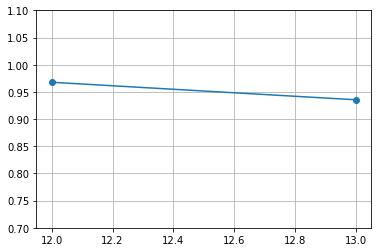

In [33]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_,marker='o')
plt.ylim([0.7, 1.1])
plt.grid()
plt.show()

In [34]:
#k5 = list(sbs.subsets_[8])
print(sbs.subsets_)

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)]


## Accessing feature importance with Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
feat_label = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs=-1)
forest.fit(X_train,y_train) #in the random forest we dont need to standardize the data
importances = forest.feature_importances_
indeces = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(feat_label[indeces[f]], importances[indeces[f]])

Color intensity 0.190583377306
Proline 0.159245942599
Flavanoids 0.149065685928
OD280/OD315 of diluted wines 0.137214038865
Alcohol 0.103508698055
Hue 0.0719308248981
Total phenols 0.0595295481494
Alcalinity of ash 0.0324798580856
Malic acid 0.0236453300587
Magnesium 0.0222010447165
Proanthocyanins 0.0219673214666
Nonflavanoid phenols 0.0158765350891
Ash 0.012751794783


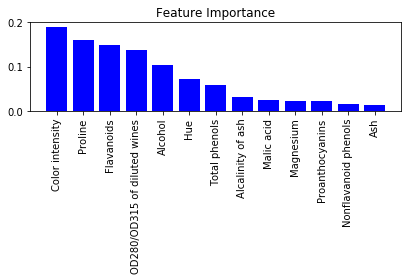

In [40]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indeces],color='blue',align='center')
plt.xticks(range(X_train.shape[1]), feat_label[indeces], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()